# Understanding Descriptive Statistics

Import the necessary libraries here:

In [181]:
# Libraries
% pip install phik==0.10.0
import pandas as pd
import numpy as np
import random as rm
from random import sample
import phik
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [96]:
# your code here
def rolling_dice():
    dice = [1,2,3,4,5,6]
    sample = list(np.random.choice(dice,10))
    d = {'Runs':list(np.arange(1,11)),'Results':sample}
    return d

In [222]:
data = rolling_dice()
data

{'Runs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Results': [2, 3, 5, 4, 1, 6, 2, 6, 4, 2]}

In [223]:
df = pd.DataFrame(data)
df

,Runs,Results
0,1,2
1,2,3
2,3,5
3,4,4
4,5,1
5,6,6
6,7,2
7,8,6
8,9,4
9,10,2


#### 2.- Plot the results sorted by value.

<AxesSubplot:xlabel='Runs'>

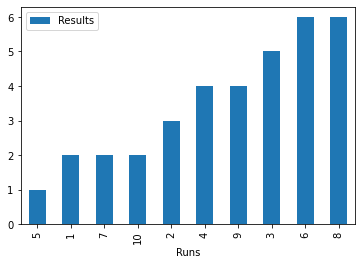

In [225]:
df.set_index('Runs')

df.sort_values('Results',inplace=True)

df.plot(x='Runs',kind='bar')

<AxesSubplot:xlabel='Results'>

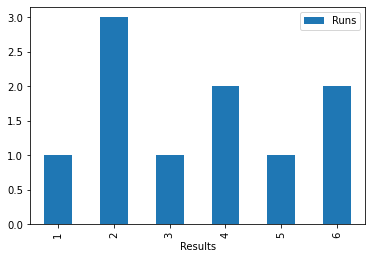

In [226]:
# your code here, get frequency distribution

# groupby results and aggregate their count
results = df.groupby(by='Results').agg('count')

results.plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<AxesSubplot:title={'center':'Results'}>]], dtype=object)

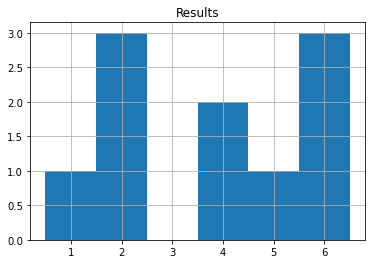

In [7]:
# your code here
bins = [n + 0.5 for n in range(7)]
df.hist(['Results'],bins=bins)

In [227]:
results

,Runs
Results,
1,1
2,3
3,1
4,2
5,1
6,2


In [9]:
"""
your comments here

the first plot gives the value of the 10 different runs, ordered ascendingly by size

the second gives the freuqency of every present result
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [100]:
# your code here
def weird_mean_calc(dfresults):
    sumv = 0
    for x in list(dfresults):
        sumv = sumv + x
    mean = sumv/len(dfresults)
    return mean

In [101]:
weird_mean_calc(df['Results'])

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [171]:
# your code here
def frequency_distribution(df, columnvalues,columnfreq):

    results = df.groupby(by=f'{columnvalues}').agg('count')
    results.reset_index(inplace=True)
    results['calcmeancolumn'] = results[f'{columnfreq}']*results[f'{columnvalues}']
    mean = results['calcmeancolumn'].sum()/results[f'{columnfreq}'].sum()
    return results

In [99]:
frequency_distribution(df)

4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [125]:
# your code here
def weird_median_calc(dfresul):
    dfresults = list(dfresul)
    if len(dfresults)%2 == 0:
        return (dfresults[int(len(dfresults)/2)]+dfresults[int((len(dfresults)/2)+1)])/2
    else:
        return dfresults[int((len(dfresults)+1)/2)]

In [126]:
weird_median_calc(df['Results'])

3.0

In [138]:
import math

5

In [142]:
sorted_ = sorted(list(df['Results']))
sorted_[math.floor((len(list(df['Results']))+1)/2)-1]

3

In [230]:
sorted_ = sorted(list(df['Results']))
sorted_

[1, 2, 2, 2, 3, 4, 4, 5, 6, 6]

In [229]:
dfresults[int((len(dfresults)+1)/2)]

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [150]:
def weird_quartile_calc(dfresul):
    dfresults = list(dfresul)
    Q2 = weird_median_calc(dfresults) 
    
    
    sorted_ = sorted(dfresults)
    Q1 = sorted_[math.floor((len(dfresults)+1)/4)-1]
    Q3 = sorted_[math.floor(3*(len(dfresults)+1)/4)-1]
    
    
    
    return f'the first quantile is {Q1}, the second {Q2}, the third {Q3}'
    

In [231]:
weird_quartile_calc(df['Results'])

'the first quantile is 2, the second 4.0, the third 5'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [145]:
# your code here
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_4_Descriptive-Statistics\roll_the_dice_hundred.csv")

In [162]:
df = pd.DataFrame(data)

In [164]:
df

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


<AxesSubplot:xlabel='roll'>

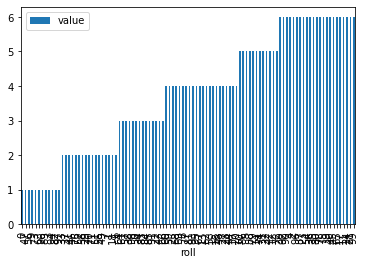

In [147]:
df.sort_values('value',inplace=True)
df.plot(x='roll',y='value', kind='bar')

In [83]:
"""
your comments here

the results sorted by values ascendingly, you can see the distribution of the values here horizontally, the thicker/wider the big bar consisting
of smaller bars all equal to same value, the bigger the frequency of that value result
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [185]:
# your code here
weird_mean_calc(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [172]:
# your code here
frequency_distribution(df,'value','roll')

,value,roll,calcmeancolumn
0,1,12,12
1,2,17,34
2,3,14,42
3,4,22,88
4,5,12,60
5,6,23,138


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

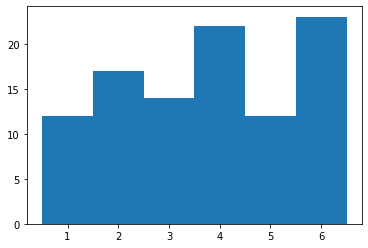

In [184]:
# your code here
import matplotlib.pyplot as plt
bins = [n + 0.5 for n in range(7)]
x = df['value']
plt.hist(x, bins=bins)

In [19]:
"""
your comments here

you can see a not normalized frequency distribution, more values with higher score result, therefor the mean is not exactly in the middle
at 3, but a little further on the left around 3.75
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [186]:
# your code here
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_4_Descriptive-Statistics\roll_the_dice_thousand.csv")

In [191]:
dth = pd.DataFrame(data)
del dth['Unnamed: 0']

In [192]:
dth

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


<AxesSubplot:xlabel='roll'>

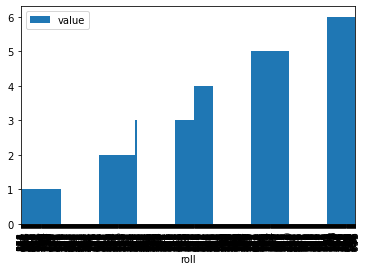

In [220]:
dth.sort_values('value',inplace=True)
dth.plot(x='roll',y='value', kind='bar')

In [194]:
frequency_distribution(dth,'value','roll')

,value,roll,calcmeancolumn
0,1,175,175
1,2,167,334
2,3,175,525
3,4,168,672
4,5,149,745
5,6,166,996


(array([175., 167., 175., 168., 149., 166.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

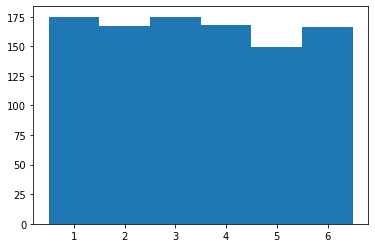

In [195]:
bins = [n + 0.5 for n in range(7)]
x = dth['value']
plt.hist(x, bins=bins)

In [21]:
"""
your comments here

the bigger the sample size, the more equal will the result of the frequency distribution be to the probability of each possible value
outcome, all values have a probability of 1/6, so all are just as likely to be the output value when rolling the dice,
exactly this statement is validated here with the bigger sample size, were all values have somewhat a similar frequency
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [196]:
# your code here
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_4_Descriptive-Statistics\ages_population.csv")

In [197]:
agb1 = pd.DataFrame(data)
agb1

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

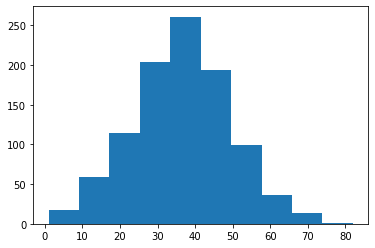

In [198]:

x = agb1['observation']
plt.hist(x, bins=10)

# guessed mean = something around 38
# guessed std = the frequency distribution is fairly normally distributed, so I would say std is close to 10, a little bigger probably
# having in mind that around 65% is in the range of mean - 1*std and mean + 1*std

In [234]:
weird_quartile_calc(agb1['observation'])

'the first quantile is 28.0, the second 44.5, the third 45.0'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [23]:
# your code here

In [199]:
weird_mean_calc(agb1['observation'])

36.56

In [201]:
agb1['observation'].mean()

36.56

In [233]:
weird_median_calc(agb1['observation'])

44.5

In [200]:
agb1['observation'].std()

12.816499625976762

In [24]:
"""
yes, the values are both to my estimations
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [202]:
# your code here
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_4_Descriptive-Statistics\ages_population2.csv")
agb2 = pd.DataFrame(data)

In [205]:
agb2

,index,observation
0,0,25.0
1,1,31.0
2,2,29.0
3,3,31.0
4,4,29.0
...,...,...
995,995,26.0
996,996,22.0
997,997,21.0
998,998,19.0


In [204]:
agb2.reset_index(inplace=True)

In [206]:
frequency_distribution(agb2,'observation','index')

,observation,index,calcmeancolumn
0,19.0,3,57.0
1,20.0,13,260.0
2,21.0,17,357.0
3,22.0,35,770.0
4,23.0,41,943.0
5,24.0,78,1872.0
6,25.0,98,2450.0
7,26.0,120,3120.0
8,27.0,125,3375.0
9,28.0,139,3892.0


(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

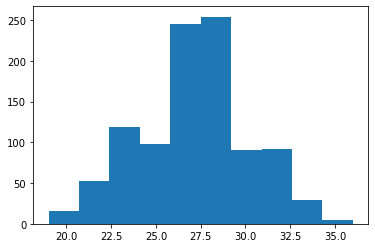

In [211]:
x = agb2['observation']
plt.hist(x, bins=10)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [26]:
"""
your comments here

the freq. distribution does not follow the schema of normal distribution as much as the previous table did, still the highest concentration
of values in the estimtated middle of the range, but no function like descendance on the side, rather a rapid drop
and even some abnormal ascending values again

a little right skewed as well

but here the range of the age is a totally different one, range beween aprox. 18 and 36 instead of full range of ages
from 0 to 80 in freq distribution before
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [212]:
# your code here
agb2['observation'].mean()

27.155

In [213]:
agb2['observation'].std()

2.969813932689186

In [28]:
"""
your comments here

mean was to be expected to lie somewhere around that value, do to highest portion of value lying in the middle of range and
no extreme skewness

and the much lower std is explainable through the much lower range, even though not as as evenly/normally distributed, 
through lower range the values can not lie as far from the mean, even though it looks that way if you compare the two
charts visually
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [214]:
# your code here
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_4_Descriptive-Statistics\ages_population3.csv")
agb3 = pd.DataFrame(data)
agb3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [217]:
agb3.reset_index(inplace=True)

In [218]:
frequency_distribution(agb3,'observation','index')

,observation,index,calcmeancolumn
0,1.0,1,1.0
1,2.0,2,4.0
2,4.0,2,8.0
3,5.0,1,5.0
4,7.0,1,7.0
...,...,...,...
70,73.0,6,438.0
71,74.0,6,444.0
72,75.0,2,150.0
73,76.0,1,76.0


(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

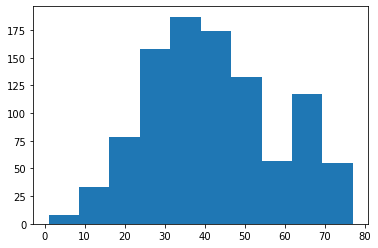

In [219]:
x = agb3['observation']
plt.hist(x, bins=10)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [215]:
# your code here
agb3['observation'].mean()

41.989

In [216]:
agb3['observation'].std()

16.144705959865934

In [31]:
"""
your comments here

this distribution has the same range again as the first frequency distribution of certain ages, but the data is now right skewed
with an abnormal high number 60-72 year old people, which "messes" with the mean as you can see, pushes it more to the right side
of the values ranges, also the std has increased due to the abnormal distribution, in average the points are therefor less close
to the mean and the std increases



"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [232]:
# your code here
weird_quartile_calc(agb3['observation'])

'the first quantile is 30.0, the second 35.0, the third 53.0'

In [33]:
"""
your comments here
difference: around 6.9
you can see by the difference between the median and the mean that the given data is not evenly distributed, the median is 
more to the right of the distribution of ages, clearly identifying this data set as right skewed, the median lies there
where the highest amount of observations are located

calculating the quartiles showed that in the dataset before the results were evenly distributed around the middle value
(between minimum and maximum possible age), in the third data set though all the quartiles as well have moved to the right
due to the skewness



"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [237]:
# your code here
ag01 = agb1['observation'].quantile(0.1)
ag09 = agb1['observation'].quantile(0.9)
agb01 = agb3['observation'].quantile(0.1)
agb09 = agb3['observation'].quantile(0.9)
print(f'for the first set these are the quantiles: {ag01}, {ag09}, for the second: {agb01}, {agb09}')

for the first set these are the quantiles: 20.0, 53.0, for the second: 22.0, 67.0


In [35]:
"""
your comments here

look for maybe 80% range in which all values lie, see if the range between those percetiles are bigger because of the
skewness

results:

the quantiles of the second data set have a larger range in between, showing that the data is not normally instributed
and spread out (skewed) to the right
there is no big difference in tenth percentile, but a larger difference for the 90th percentile, once again showing the
right skewness of the data
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [36]:
# your code here

In [37]:
"""
your comments here
"""

'\nyour comments here\n'